<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/11_1_2_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

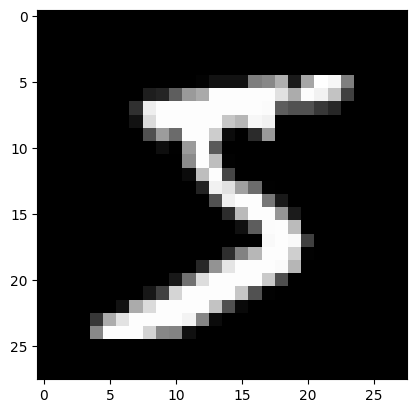

In [ ]:
# Lab 11 MNIST and Convolutional Neural Network
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt


mnist = tf.keras.datasets.mnist # 데이터 로드

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0].reshape(28,28), cmap ='gray')

Tensor("Conv2D_11:0", shape=(1, 14, 14, 5), dtype=float32)


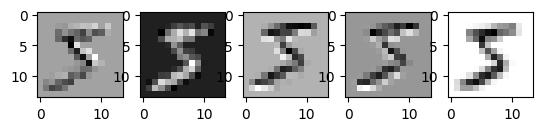

In [ ]:
with tf.compat.v1.Session() as sess:
  img = x_train[0] / 255
  img = img.reshape(-1, 28,28,1) # 28x28x1의 이미지이고 -1은 몇개인지 계산해서 자동으로 입력해라의미
  img = img.astype('float32')
  W1 = tf.Variable(tf.random.normal([3,3,1,5], stddev=0.01)) # 3x3x1크기의 5개 layer 필터를 사용
  conv2d = tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='SAME') # stride는 x,y축으로 각각 2칸씩 건너뛰어 연산, padding가 same이어서 입력이미지 크기와 동일해야하지만 strdie 2로인해 출력이미지 크기가 반으로 줄어든다
  print(conv2d)

  sess.run(tf.compat.v1.global_variables_initializer())
  conv2d_img = conv2d.eval()
  conv2d_img = np.swapaxes(conv2d_img, 0, 3)

  # 입력이미지 x 5개의 필터 결과
  for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')


Tensor("MaxPool2d_3:0", shape=(1, 7, 7, 5), dtype=float32)


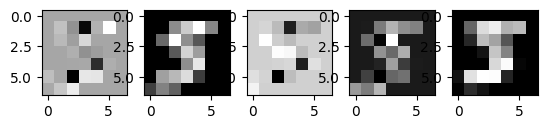

In [ ]:
# Max pooling
with tf.compat.v1.Session() as sess:
  pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME") # 이미지크기가 stride로 인헤 반으로 줄어들어 7x7크기가 된다
  print(pool)

  sess.run(tf.compat.v1.global_variables_initializer()) # 실
  pool_img = pool.eval()
  pool_img = np.swapaxes(pool_img, 0, 3)
  for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7), cmap='gray')